## IPEDS Data Exploration and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Read in School Information

In [2]:
directory = pd.read_csv("../data/ipeds_directory_info_2017_18.csv")

In [3]:
directory.head()

,school_id,institution_name,address,city,state_abbr,zipcode,fips_code,bea_region,employer_id,ope_id,...,cbsa_type,csa,necta,fips_county_code,county_name,congress_dist,longitude,latitude,data_fdbk_group,data_fdbk_custom
0,100654,Alabama A & M University,4900 Meridian Street,Normal,AL,35762,1,5,636001109,100200.0,...,1,290,-2,1089,Madison County,105,-86.568502,34.783368,122,1
1,100663,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,35294-0110,1,5,636005396,105200.0,...,1,142,-2,1073,Jefferson County,107,-86.799345,33.505697,109,1
2,100690,Amridge University,1200 Taylor Rd,Montgomery,AL,36117-3553,1,5,237034324,2503400.0,...,1,-2,-2,1101,Montgomery County,102,-86.174010,32.362609,141,2
3,100706,University of Alabama in Huntsville,301 Sparkman Dr,Huntsville,AL,35899,1,5,630520830,105500.0,...,1,290,-2,1089,Madison County,105,-86.640449,34.724557,112,2
4,100724,Alabama State University,915 S Jackson Street,Montgomery,AL,36104-0271,1,5,636001101,100500.0,...,1,-2,-2,1101,Montgomery County,107,-86.295677,32.364317,131,1


In [4]:
## look at shape
directory.shape

(7153, 62)

In [5]:
directory.tail()

,school_id,institution_name,address,city,state_abbr,zipcode,fips_code,bea_region,employer_id,ope_id,...,cbsa_type,csa,necta,fips_county_code,county_name,congress_dist,longitude,latitude,data_fdbk_group,data_fdbk_custom
7148,491385,Wright Institute (The) -,2501 9th Street,Berkeley,CA,94710-2254,6,8,-1,884601.0,...,1,488,-2,6001,Alameda County,613,-122.291518,37.860543,-2,-2
7149,491394,Edge Tech Academy,"8701 Bedford Euless Road, Suite 610",Hurst,TX,76053-3701,48,6,461749258,2306812.0,...,1,206,-2,48439,Tarrant County,4812,-97.196111,32.834122,235,2
7150,491419,Health Career Institute- Lauderdale Lakes,4850 West Oakland Park Boulevard,Lauderdale Lakes,FL,33313-7268,12,5,-1,4182601.0,...,1,370,-2,12011,Broward County,1220,-80.216743,26.163240,-2,-2
7151,491428,National University College - Mayaguez Campus,"Road #2 Km.156.3, Bo. Sabalos",Mayaguez,PR,00680-0000,72,9,-1,2260605.0,...,1,364,-2,72097,Mayagüez Municipio,7298,-67.149938,18.184231,-2,-2
7152,491437,New Castle School of Trades - East Liverpool C...,129 E. 5th Street,East Liverpool,OH,43920-3025,39,3,-1,778003.0,...,2,566,-2,39029,Columbiana County,3906,-80.578398,40.619042,-2,-2


In [6]:
## count of nulls
directory.isna().sum()

school_id           0
institution_name    0
address             0
city                0
state_abbr          0
                   ..
congress_dist       0
longitude           0
latitude            0
data_fdbk_group     0
data_fdbk_custom    0
Length: 62, dtype: int64

## Read in Admissions Information

In [7]:
admissions_cond = pd.read_csv("../data/ipeds_admissions_2017_18.csv")

In [8]:
admissions_cond.head()

,school_id,cond_gpa,cond_two_rank,cond_three_record,cond_college_prep,cond_recommend,cond_demo_comp,cond_test_scores,cond_toefl,cond_other_test,...,sat_verb_25,sat_verb_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_eng_25,act_eng_75,act_math_25,act_math_75
0,100654,1,2,1,2,3,2,1,1,3,...,365.0,485.0,360.0,495.0,16.0,19.0,14.0,20.0,15.0,18.0
1,100663,1,3,1,1,3,3,1,3,3,...,440.0,630.0,550.0,740.0,21.0,28.0,22.0,31.0,21.0,26.0
2,100706,1,2,1,1,3,2,1,1,3,...,550.0,660.0,530.0,670.0,25.0,31.0,25.0,33.0,24.0,29.0
3,100724,1,3,2,3,3,3,1,1,3,...,380.0,485.0,375.0,481.0,16.0,20.0,15.0,19.0,14.0,19.0
4,100751,1,2,1,1,3,3,1,1,3,...,530.0,640.0,520.0,640.0,23.0,32.0,23.0,33.0,21.0,29.0


In [9]:
## How many options in entrance considerations? How many schools stress each the most out of 7153 schools.
admissions_cond['cond_gpa'].value_counts()

1    1557
3     266
2     193
5      59
Name: cond_gpa, dtype: int64

In [10]:
admissions_cond['cond_test_scores'].value_counts()

1    1212
3     441
2     279
5     143
Name: cond_test_scores, dtype: int64

In [11]:
admissions_cond['cond_college_prep'].value_counts()

2    821
1    622
3    559
5     73
Name: cond_college_prep, dtype: int64

## Added columns for sat_comp_25 and sat_comp_75  as these were not in database

In [12]:
admissions_cond['sat_comp_25'] = admissions_cond['sat_verb_25'] + admissions_cond['sat_math_25']
admissions_cond['sat_comp_75'] = admissions_cond['sat_verb_75'] + admissions_cond['sat_math_75']

## Some EDA on this dataset

In [13]:
## look at shape
admissions_cond.shape

(2075, 41)

In [14]:
## look at nulls
admissions_cond.isna().sum()

school_id              0
cond_gpa               0
cond_two_rank          0
cond_three_record      0
cond_college_prep      0
cond_recommend         0
cond_demo_comp         0
cond_test_scores       0
cond_toefl             0
cond_other_test        0
applicants_total       0
applicants_men         2
applicants_women       2
admissions            28
admiss_men           106
admiss_women         106
enrollment            32
enroll_men           116
enroll_women         109
enroll_ft             45
enroll_ft_men        140
enroll_ft_women      129
enroll_pt            545
enroll_pt_men        604
enroll_pt_women      559
sat_number           738
sat_percent          740
act_number           741
act_percent          741
sat_verb_25          836
sat_verb_75          836
sat_math_25          836
sat_math_75          836
act_comp_25          779
act_comp_75          779
act_eng_25           859
act_eng_75           859
act_math_25          859
act_math_75          859
sat_comp_25          836


## Read in derived admissions stats

In [15]:
admissions_derived = pd.read_csv("../data/ipeds_derived_admiss_stats_2017.csv")

In [16]:
admissions_derived.head()

,school_id,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,admit_yield_women,admit_yield_ft,yield_ft_men,yield_ft_women,admit_yield_pt,yield_pt_men,yield_pt_women
0,100654,90,88.0,91.0,17.0,19.0,15.0,17.0,19.0,15.0,0.0,0.0,0.0
1,100663,92,91.0,92.0,33.0,35.0,32.0,32.0,33.0,31.0,1.0,1.0,1.0
2,100706,81,84.0,77.0,37.0,42.0,32.0,37.0,41.0,31.0,0.0,0.0,0.0
3,100724,98,97.0,98.0,14.0,17.0,14.0,14.0,17.0,14.0,0.0,0.0,0.0
4,100751,53,54.0,53.0,36.0,40.0,34.0,36.0,40.0,34.0,0.0,0.0,0.0


In [17]:
admissions_derived.shape

(2047, 13)

Text(0.5, 1.0, 'Percentage of Applicants Accepted')

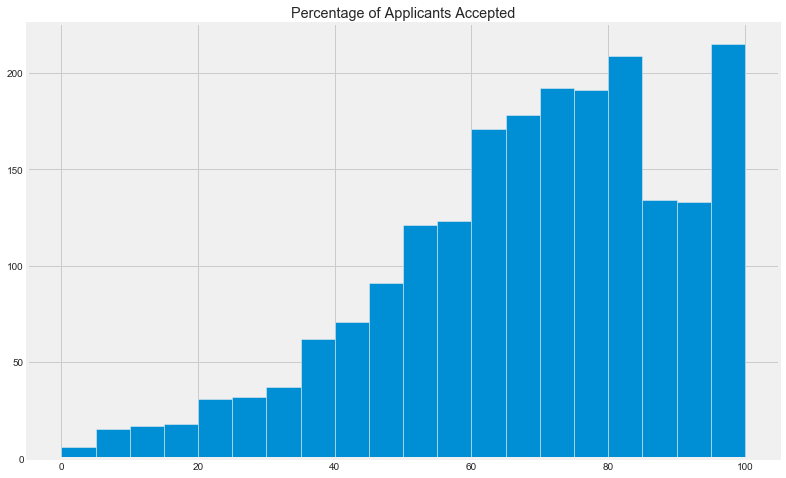

In [18]:
## Histgram of percent admitted
plt.figure(figsize=(12, 8))
admissions_derived['perc_admit_total'].hist(bins=20)
plt.title('Percentage of Applicants Accepted')

Text(0.5, 1.0, 'Percentage of Students that Enrolled')

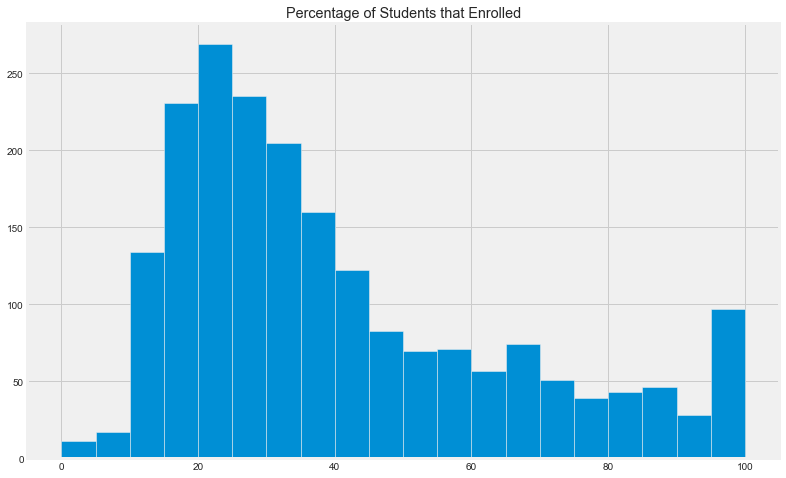

In [19]:
## Histgram of percent enrolled
plt.figure(figsize=(12, 8))
admissions_derived['admit_yield_total'].hist(bins=20)
plt.title('Percentage of Students that Enrolled')

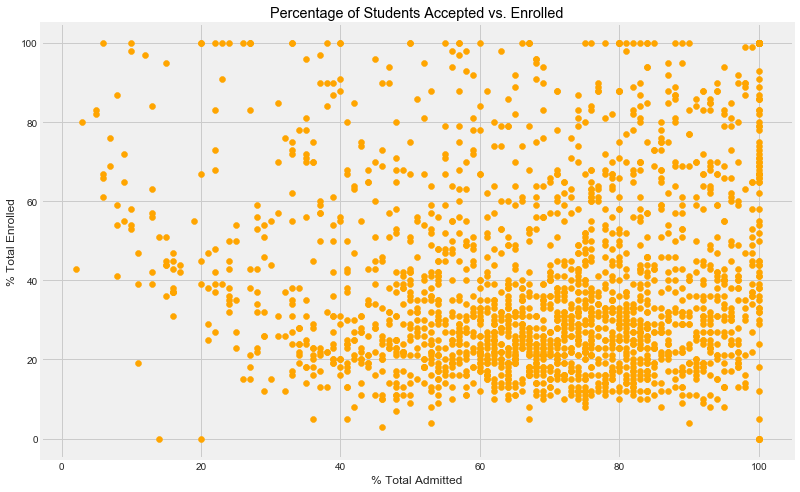

In [20]:
##Scatter Plot of Total Students accepted vs. enrolled
plt.figure(figsize=(12, 8))
plt.scatter('perc_admit_total', 'admit_yield_total', data = admissions_derived, c='orange')
plt.xlabel('% Total Admitted')
plt.ylabel('% Total Enrolled')
plt.title('Percentage of Students Accepted vs. Enrolled', color = 'black');

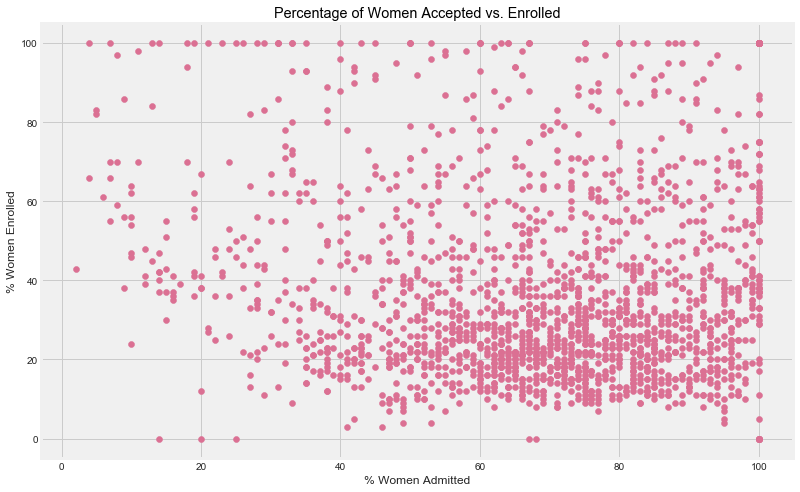

In [21]:
##Scatter Plot of Women accepted vs. enrolled
plt.figure(figsize=(12, 8))
plt.scatter('perc_admit_women', 'admit_yield_women', data = admissions_derived, c='palevioletred')
plt.xlabel('% Women Admitted')
plt.ylabel('% Women Enrolled')
plt.title('Percentage of Women Accepted vs. Enrolled', color = 'black');

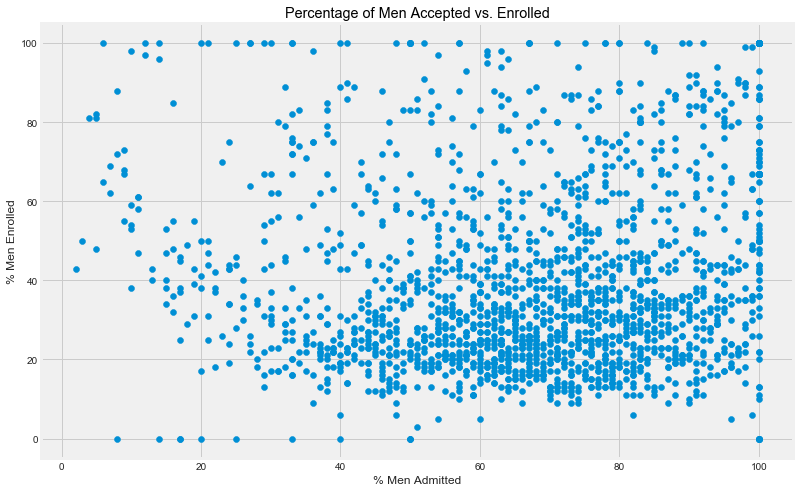

In [22]:
##Scatter Plot of Men accepted vs. enrolled
plt.figure(figsize=(12, 8))
plt.scatter('perc_admit_men', 'admit_yield_men', data = admissions_derived)
plt.xlabel('% Men Admitted')
plt.ylabel('% Men Enrolled')
plt.title('Percentage of Men Accepted vs. Enrolled', color = 'black');

## Schools that accept less than 35% of applicants...

In [23]:
## Some shools had zero acceptance so I filtered these out.
hi_selective_schools = admissions_derived.loc[(admissions_derived['perc_admit_total'] < 35) & (admissions_derived['perc_admit_total'] != 0)]

In [24]:
hi_selective_schools.shape

(152, 13)

In [25]:
hi_selective_schools

,school_id,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,admit_yield_women,admit_yield_ft,yield_ft_men,yield_ft_women,admit_yield_pt,yield_pt_men,yield_pt_women
14,101587,28,30.0,27.0,22.0,23.0,21.0,22.0,23.0,21.0,0.0,0.0,0.0
64,110404,8,5.0,16.0,41.0,48.0,35.0,41.0,48.0,35.0,0.0,0.0,0.0
77,110583,28,27.0,29.0,23.0,24.0,23.0,23.0,23.0,23.0,0.0,1.0,0.0
81,110635,17,15.0,19.0,44.0,47.0,42.0,44.0,46.0,41.0,0.0,0.0,0.0
84,110662,16,15.0,17.0,37.0,34.0,39.0,37.0,34.0,39.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,486123,27,35.0,20.0,15.0,17.0,12.0,15.0,17.0,12.0,0.0,0.0,0.0
2010,486956,33,50.0,25.0,75.0,100.0,50.0,75.0,100.0,50.0,0.0,0.0,0.0
2012,487092,29,29.0,29.0,12.0,13.0,11.0,12.0,13.0,11.0,0.0,0.0,0.0
2026,488819,6,6.0,7.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0


In [26]:
hi_selective_schools.tail()

,school_id,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,admit_yield_women,admit_yield_ft,yield_ft_men,yield_ft_women,admit_yield_pt,yield_pt_men,yield_pt_women
2002,486123,27,35.0,20.0,15.0,17.0,12.0,15.0,17.0,12.0,0.0,0.0,0.0
2010,486956,33,50.0,25.0,75.0,100.0,50.0,75.0,100.0,50.0,0.0,0.0,0.0
2012,487092,29,29.0,29.0,12.0,13.0,11.0,12.0,13.0,11.0,0.0,0.0,0.0
2026,488819,6,6.0,7.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0
2028,489353,25,0.0,40.0,50.0,NaN,50.0,50.0,NaN,50.0,0.0,NaN,0.0


## Merge with basic school directory info so we have school name and loction...

In [27]:
## create subset of directory dataframe
basic_school_info = directory[['school_id', 'institution_name', 'city', 'state_abbr', 'zipcode']]

In [28]:
basic_school_info

,school_id,institution_name,city,state_abbr,zipcode
0,100654,Alabama A & M University,Normal,AL,35762
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110
2,100690,Amridge University,Montgomery,AL,36117-3553
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899
4,100724,Alabama State University,Montgomery,AL,36104-0271
...,...,...,...,...,...
7148,491385,Wright Institute (The) -,Berkeley,CA,94710-2254
7149,491394,Edge Tech Academy,Hurst,TX,76053-3701
7150,491419,Health Career Institute- Lauderdale Lakes,Lauderdale Lakes,FL,33313-7268
7151,491428,National University College - Mayaguez Campus,Mayaguez,PR,00680-0000


In [29]:
## merge with hi_selective_schools
hi_selective_schools = pd.merge(basic_school_info, hi_selective_schools, how = 'right', on = 'school_id')

In [30]:
hi_selective_schools.head()

,school_id,institution_name,city,state_abbr,zipcode,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,admit_yield_women,admit_yield_ft,yield_ft_men,yield_ft_women,admit_yield_pt,yield_pt_men,yield_pt_women
0,101587,University of West Alabama,Livingston,AL,35470,28,30.0,27.0,22.0,23.0,21.0,22.0,23.0,21.0,0.0,0.0,0.0
1,110404,California Institute of Technology,Pasadena,CA,91125,8,5.0,16.0,41.0,48.0,35.0,41.0,48.0,35.0,0.0,0.0,0.0
2,110583,California State University-Long Beach,Long Beach,CA,90840-0115,28,27.0,29.0,23.0,24.0,23.0,23.0,23.0,23.0,0.0,1.0,0.0
3,110635,University of California-Berkeley,Berkeley,CA,94720,17,15.0,19.0,44.0,47.0,42.0,44.0,46.0,41.0,0.0,0.0,0.0
4,110662,University of California-Los Angeles,Los Angeles,CA,90095-1405,16,15.0,17.0,37.0,34.0,39.0,37.0,34.0,39.0,0.0,0.0,0.0


In [31]:
hi_selective_schools.tail()

,school_id,institution_name,city,state_abbr,zipcode,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,admit_yield_women,admit_yield_ft,yield_ft_men,yield_ft_women,admit_yield_pt,yield_pt_men,yield_pt_women
147,486123,Theatre of Arts,Hollywood,CA,90028-6111,27,35.0,20.0,15.0,17.0,12.0,15.0,17.0,12.0,0.0,0.0,0.0
148,486956,Chamberlain University-New Jersey,North Brunswick,NJ,08902-3492,33,50.0,25.0,75.0,100.0,50.0,75.0,100.0,50.0,0.0,0.0,0.0
149,487092,Emory University-Oxford College,Oxford,GA,30054,29,29.0,29.0,12.0,13.0,11.0,12.0,13.0,11.0,0.0,0.0,0.0
150,488819,The Colburn Conservatory of Music,Los Angeles,CA,90012,6,6.0,7.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0
151,489353,Chamberlain University-California,Rancho Cordova,CA,95670,25,0.0,40.0,50.0,NaN,50.0,50.0,NaN,50.0,0.0,NaN,0.0


In [32]:
hi_selective_schools.shape

(152, 17)

## Website used for highly selective school criteria. Used second category to pull first two groups of schools.
https://www.collegetransitions.com/college-selectivity/#:~:text=EXTREMELY%20SELECTIVE%20colleges%20accept%20fewer,score%20of%20at%20least%201340.

## Define "highly selective" as all schools that meet these conditions: 
- Accept fewer than 35% of all applicants,
- AND possess an average composite ACT (25%tile) score of at least 29 
- OR an average combined SAT (25%tile) score of at least 1340.

In [33]:
test_scores = admissions_cond[['school_id', 'sat_comp_25', 'sat_comp_75','sat_verb_25', 'sat_verb_75', 'sat_math_25', 'sat_math_75', 
                              'act_comp_25', 'act_comp_75', 'act_eng_25', 'act_eng_75', 'act_math_25', 'act_math_75']]

### Merge in the test score data

In [34]:
hi_selective_schools = pd.merge(hi_selective_schools, test_scores, how = 'left', on = 'school_id')

In [35]:
hi_selective_schools.head()

,school_id,institution_name,city,state_abbr,zipcode,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,...,sat_verb_25,sat_verb_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_eng_25,act_eng_75,act_math_25,act_math_75
0,101587,University of West Alabama,Livingston,AL,35470,28,30.0,27.0,22.0,23.0,...,440.0,520.0,420.0,500.0,18.0,23.0,17.0,24.0,16.0,22.0
1,110404,California Institute of Technology,Pasadena,CA,91125,8,5.0,16.0,41.0,48.0,...,750.0,790.0,780.0,800.0,34.0,35.0,34.0,36.0,35.0,36.0
2,110583,California State University-Long Beach,Long Beach,CA,90840-0115,28,27.0,29.0,23.0,24.0,...,510.0,610.0,510.0,620.0,20.0,26.0,19.0,26.0,19.0,27.0
3,110635,University of California-Berkeley,Berkeley,CA,94720,17,15.0,19.0,44.0,47.0,...,630.0,720.0,630.0,760.0,30.0,34.0,29.0,35.0,28.0,35.0
4,110662,University of California-Los Angeles,Los Angeles,CA,90095-1405,16,15.0,17.0,37.0,34.0,...,620.0,710.0,600.0,740.0,29.0,34.0,28.0,35.0,27.0,34.0


In [ ]:
hi_selective_schools.isna().sum()

## Now filter for the test score criteria

In [37]:
hi_schools_with_scores = hi_selective_schools.loc[(hi_selective_schools['act_comp_25'] >= 29.0)|(hi_selective_schools['sat_comp_25'] >= 1340.0)]

In [38]:
hi_schools_with_scores.shape

(61, 29)

In [39]:
hi_schools_with_scores.head()

,school_id,institution_name,city,state_abbr,zipcode,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,...,sat_verb_25,sat_verb_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_eng_25,act_eng_75,act_math_25,act_math_75
1,110404,California Institute of Technology,Pasadena,CA,91125,8,5.0,16.0,41.0,48.0,...,750.0,790.0,780.0,800.0,34.0,35.0,34.0,36.0,35.0,36.0
3,110635,University of California-Berkeley,Berkeley,CA,94720,17,15.0,19.0,44.0,47.0,...,630.0,720.0,630.0,760.0,30.0,34.0,29.0,35.0,28.0,35.0
4,110662,University of California-Los Angeles,Los Angeles,CA,90095-1405,16,15.0,17.0,37.0,34.0,...,620.0,710.0,600.0,740.0,29.0,34.0,28.0,35.0,27.0,34.0
8,112260,Claremont McKenna College,Claremont,CA,91711-6400,10,11.0,10.0,53.0,61.0,...,660.0,740.0,680.0,770.0,30.0,34.0,30.0,35.0,28.0,34.0
9,115409,Harvey Mudd College,Claremont,CA,91711,15,10.0,28.0,36.0,38.0,...,720.0,770.0,750.0,800.0,33.0,35.0,33.0,35.0,33.0,35.0


In [40]:
hi_schools_with_scores.reset_index(drop=True)

,school_id,institution_name,city,state_abbr,zipcode,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,...,sat_verb_25,sat_verb_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_eng_25,act_eng_75,act_math_25,act_math_75
0,110404,California Institute of Technology,Pasadena,CA,91125,8,5.0,16.0,41.0,48.0,...,750.0,790.0,780.0,800.0,34.0,35.0,34.0,36.0,35.0,36.0
1,110635,University of California-Berkeley,Berkeley,CA,94720,17,15.0,19.0,44.0,47.0,...,630.0,720.0,630.0,760.0,30.0,34.0,29.0,35.0,28.0,35.0
2,110662,University of California-Los Angeles,Los Angeles,CA,90095-1405,16,15.0,17.0,37.0,34.0,...,620.0,710.0,600.0,740.0,29.0,34.0,28.0,35.0,27.0,34.0
3,112260,Claremont McKenna College,Claremont,CA,91711-6400,10,11.0,10.0,53.0,61.0,...,660.0,740.0,680.0,770.0,30.0,34.0,30.0,35.0,28.0,34.0
4,115409,Harvey Mudd College,Claremont,CA,91711,15,10.0,28.0,36.0,38.0,...,720.0,770.0,750.0,800.0,33.0,35.0,33.0,35.0,33.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,234076,University of Virginia-Main Campus,Charlottesville,VA,22903-2628,27,26.0,28.0,38.0,36.0,...,660.0,740.0,650.0,760.0,29.0,33.0,30.0,35.0,28.0,33.0
57,234207,Washington and Lee University,Lexington,VA,24450-2116,22,22.0,22.0,39.0,42.0,...,680.0,740.0,670.0,750.0,31.0,33.0,31.0,35.0,28.0,33.0
58,243744,Stanford University,Stanford,CA,94305,5,4.0,5.0,82.0,81.0,...,690.0,760.0,700.0,780.0,32.0,35.0,33.0,36.0,30.0,35.0
59,441982,Franklin W Olin College of Engineering,Needham,MA,02492-1200,13,8.0,28.0,63.0,72.0,...,710.0,770.0,740.0,800.0,33.0,35.0,33.0,35.0,31.0,35.0


In [41]:
hi_schools_with_scores.sort_values(by = ['perc_admit_total'])

,school_id,institution_name,city,state_abbr,zipcode,perc_admit_total,perc_admit_men,perc_admit_women,admit_yield_total,admit_yield_men,...,sat_verb_25,sat_verb_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_eng_25,act_eng_75,act_math_25,act_math_75
51,166027,Harvard University,Cambridge,MA,2138,5,5.0,5.0,83.0,82.0,...,730.0,790.0,730.0,800.0,32.0,35.0,34.0,36.0,31.0,35.0
128,243744,Stanford University,Stanford,CA,94305,5,4.0,5.0,82.0,81.0,...,690.0,760.0,700.0,780.0,32.0,35.0,33.0,36.0,30.0,35.0
73,190150,Columbia University in the City of New York,New York,NY,10027,6,7.0,6.0,61.0,62.0,...,710.0,780.0,730.0,800.0,33.0,35.0,33.0,35.0,30.0,35.0
67,186131,Princeton University,Princeton,NJ,08544-0070,6,6.0,7.0,66.0,65.0,...,710.0,780.0,720.0,790.0,31.0,35.0,33.0,35.0,30.0,35.0
52,166683,Massachusetts Institute of Technology,Cambridge,MA,02139-4307,7,5.0,11.0,76.0,81.0,...,720.0,770.0,770.0,800.0,33.0,35.0,34.0,36.0,34.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,233374,University of Richmond,University of Richmond,VA,23173,33,35.0,32.0,24.0,25.0,...,630.0,710.0,640.0,750.0,29.0,32.0,NaN,NaN,NaN,NaN
14,123165,Scripps College,Claremont,CA,91711-3905,33,NaN,33.0,34.0,NaN,...,660.0,730.0,630.0,730.0,29.0,33.0,31.0,35.0,27.0,32.0
50,165015,Brandeis University,Waltham,MA,02454-9110,34,31.0,36.0,21.0,23.0,...,630.0,710.0,650.0,760.0,29.0,33.0,29.0,34.0,28.0,34.0
96,203535,Kenyon College,Gambier,OH,43022,34,32.0,35.0,24.0,25.0,...,640.0,730.0,623.0,730.0,29.0,33.0,29.0,35.0,26.0,31.0


In [42]:
## Average act_comp_25
hi_schools_with_scores['act_comp_25'].mean()

30.80327868852459

In [43]:
## Average act_comp_75
hi_schools_with_scores['act_comp_75'].mean()

33.85245901639344

In [44]:
## Average sat_comp_25
hi_schools_with_scores['sat_comp_25'].mean()

1364.0655737704917

In [45]:
## Average sat_comp_75
hi_schools_with_scores['sat_comp_75'].mean()

1525.4098360655737